# Statistika dan Probabilitas (B): Kelompok 10
**Diandra Naufal A** / 5027231004
· **Fadlillah Cantika S H** / 5027231042
· **Rafika Az Zahra K** / 5027231050

# Exploratory Data Analysis

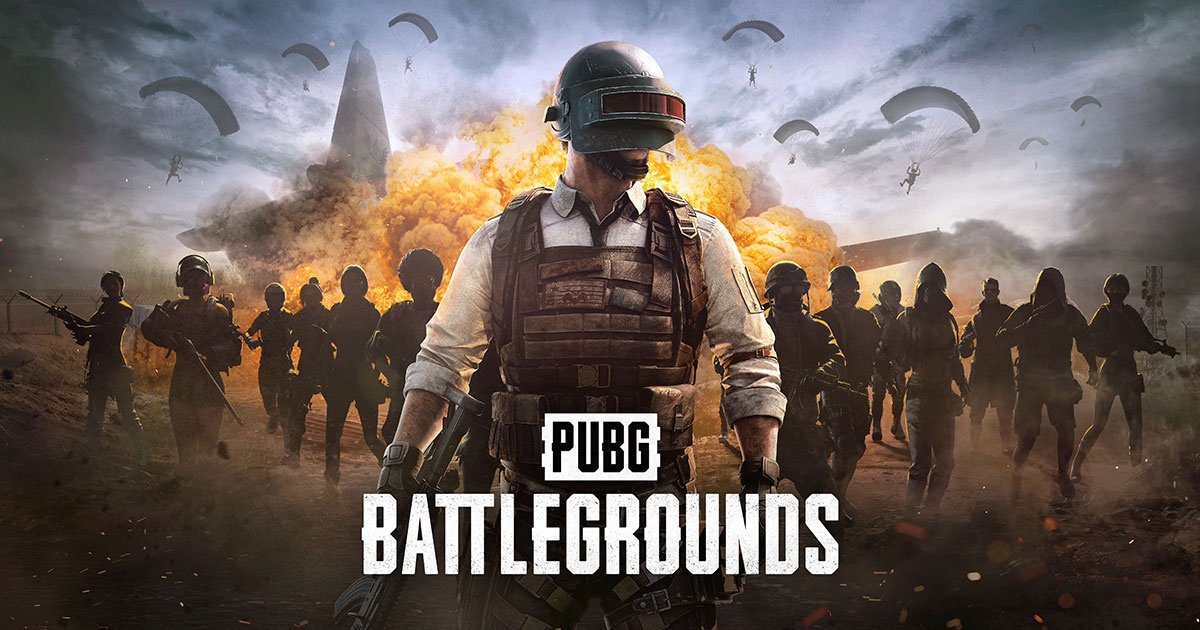

## I. Dataset
Kami menggunakan dataset asli _open-source_ dari Kaggle.com dengan deskripsi sebagai berikut:
- **Nama Dataset** : PUBG Weapon Stats
- **Deskripsi** : This dataset contains details about the weapon types, ammo type, damage stats, etc. of PUBG Mobile.
- **Daftar Atribut** :

| Atribut | Deskripsi |
| :--- | :--- |
| Weapon Name | Nama senjatanya. |
| Weapon Type | Jenis senjatanya. |
| Bullet Type | Jenis amunisi. |
| Damage | Kerusakan yang diberikan oleh senjata. |
| Magazine Capacity | Kapasitas senjata. |
| Range | Jarak tembak senjata (dalam meter). |
| Bullet Speed | Kecepatan peluru senjata. |
| Rate of Fire | Kecepatan tembakan senjata. |
| Shots to Kill (Chest) | Jumlah tembakan (Dada) yang diperlukan untuk membunuh seorang pemain. |
| Shots to Kill (Head) | Jumlah tembakan (Kepala) yang diperlukan untuk membunuh seorang pemain. |
| Damage Per Second | Kerusakan per detik diberikan senjata. |
| Fire Mode | Mode tembakan disediakan oleh senjata. |
| BDMG_0 | Kerusakan tubuh terjadi saat tidak mengenakan rompi. |
| BDMG_1 | Kerusakan tubuh terjadi saat memakai rompi level 1. |
| BDMG_2 | Kerusakan tubuh terjadi saat memakai rompi level 2. |
| BDMG_3 | Kerusakan tubuh terjadi saat memakai rompi level 3. |
| HDMG_0 | Kerusakan kepala terjadi saat tidak memakai helm. |
| HDMG_1 | Kerusakan kepala terjadi saat memakai Helm Level 1. |
| HDMG_2 | Kerusakan kepala terjadi saat memakai Helm Level 2. |
| HDMG_3 | Kerusakan kepala terjadi saat memakai Helm Level 3. |

- **Jumlah Kolom** : 20
- **Jumlah Baris** : 43
- **Sumber** : https://www.kaggle.com/datasets/aadhavvignesh/pubg-weapon-stats/data
## II. Tujuan Analisis
Untuk memahami performa senjata, mengidentifikasi senjata unggulan, mengetahui distribusi senjata, mengoptimalkan _loadout_ pemain, dan menyesuaikan strategi permainan. Dengan memanfaatkan statistik senjata, pemain dapat membuat keputusan yang lebih baik dalam pemilihan senjata, _attachment_, dan strategi. Kami mencari parameter sebagai berikut:

| Nama Parameter |
| :-- |
| Distribusi Jenis Senjata |
| Distribusi Jenis Amunisi |
| Distribusi Mode Tembakan Senjata |
| Jumlah Amunisi pada Magazin Senjata |
| Letalitas Senjata |
| Kemampuan Jarak Jauh Senjata |
| Visualisasi Diagram Radar untuk _Assault Rifle_ |

### 1. Memahami Dataset
#### a. Memuat Dataset
Dataset yang berupa file .csv diolah dengan menggunakan library Pandas dalam lingkungan pemrograman python.

In [1]:
# mengimpor library
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


# memuat dataset
df = pd.read_csv('pubg-weapon-stats.csv')

#### b. Menampilkan Dataset
Mengamati entri data guna mendapatkan gambaran singkat tentang struktur dan formatnya.

In [2]:
# menampilkan keseluruhan dataset
df

Weapon Name              Weapon Type  Bullet Type  Damage  \
0         Groza            Assault Rifle         7.62      49   
1           AKM            Assault Rifle         7.62      49   
2          M762            Assault Rifle         7.62      47   
3   MK47 Mutant            Assault Rifle         7.62      49   
4        AUG A3            Assault Rifle         5.56      43   
5        SCAR-L            Assault Rifle         5.56      43   
6          M416            Assault Rifle         5.56      43   
7         M16A4            Assault Rifle         5.56      43   
8          G36C            Assault Rifle         5.56      43   
9           OBZ            Assault Rifle         5.56      43   
10         M249        Light Machine Gun         5.56      45   
11        DP-28        Light Machine Gun         7.62      51   
12       Vector           Submachine Gun         9.00      31   
13          Uzi           Submachine Gun         9.00      26   
14     PP-Bizon           Submachine Gun         9.00      35   
15         MP5K           Submachine Gun         9.00      33   
16     Thompson           Submachine Gun         0.45      40   
17        UMP45           Submachine Gun         0.45      39   
18         S686                  Shotgun        12.00     216   
19        S1897                  Shotgun        12.00     216   
20         S12K                  Shotgun        12.00     198   
21         MK14  Designed Marksman Rifle         7.62      61   
22          SLR  Designed Marksman Rifle         7.62      56   
23          SKS  Designed Marksman Rifle         7.62      53   
24          QBU  Designed Marksman Rifle         5.56      48   
25       Mini14  Designed Marksman Rifle         5.56      46   
26          VSS  Designed Marksman Rifle         9.00      41   
27          AWM             Sniper Rifle         0.30     105   
28          M24             Sniper Rifle         7.62      79   
29        Kar98             Sniper Rifle         7.62      75   
30        Win94             Sniper Rifle         0.45      66   
31    Sawed-Off                   Pistol        12.00     160   
32        R1895                   Pistol         7.62      55   
33          R45                   Pistol         0.45      55   
34        P1911                   Pistol         0.45      41   
35          P92                   Pistol         9.00      35   
36         P18C                   Pistol         9.00      23   
37     Skorpion                   Pistol         9.00      22   
38     Crossbow                    Other          NaN     106   
39          Pan                    Melee          NaN      80   
40      Crowbar                    Melee          NaN      60   
41       Sickle                    Melee          NaN      60   
42      Machete                    Melee          NaN      60   
43        Punch                    Melee          NaN      18   

    Magazine Capacity  Range  Bullet Speed  Rate of Fire  \
0                  30  400.0         715.0        0.0800   
1                  30  400.0         710.0        0.0100   
2                  30  400.0         715.0        0.0860   
3                  30  500.0         715.0        0.0100   
4                  30  600.0         880.0        0.0860   
5                  30  600.0         880.0        0.0960   
6                  30  600.0         890.0        0.0860   
7                  30  600.0         900.0        0.0100   
8                  30  600.0         880.0        0.0860   
9                  30  600.0         880.0        0.0960   
10                100  400.0         915.0        0.0750   
11                 47  600.0         715.0        0.1090   
12                 19   50.0         300.0        0.0550   
13                 25  200.0         350.0        0.0480   
14                 53  300.0         300.0        0.0760   
15                 30  200.0         330.0        0.0645   
16                 30  200.0         280.0        0.0860  

43 _rows_ × 20 _columns_

Dapat diamati bahwa terdapat **43 baris** dan **20 kolom** dalam dataset.

In [3]:
# menampilkan lima contoh data teratas
df.head()

Weapon Name    Weapon Type  Bullet Type  Damage  Magazine Capacity  Range  \
0        Groza  Assault Rifle         7.62      49                 30  400.0   
1          AKM  Assault Rifle         7.62      49                 30  400.0   
2         M762  Assault Rifle         7.62      47                 30  400.0   
3  MK47 Mutant  Assault Rifle         7.62      49                 30  500.0   
4       AUG A3  Assault Rifle         5.56      43                 30  600.0   

   Bullet Speed  Rate of Fire  Shots to Kill (Chest)  Shots to Kill (Head)  \
0         715.0         0.080                      4                     2   
1         710.0         0.010                      4                     2   
2         715.0         0.086                      4                     2   
3         715.0         0.010                      4                     2   
4         880.0         0.086                      4                     2   

   Damage Per Second                 Fire Mode  BDMG_0  BDMG_1  BDMG_2  \
0              612.0  Single, Automatic, Burst    47.0    34.3    29.4   
1              490.0         Single, Automatic    47.0    34.3    29.4   
2              547.0  Single, Automatic, Burst    46.0    32.9    28.2   
3              490.0             Single, Burst    49.0    34.3    29.4   
4              502.0         Single, Automatic    41.0    30.1    25.8   

   BDMG_3  HDMG_0  HDMG_1  HDMG_2  HDMG_3  
0    22.0   115.1    80.6    69.0    51.8  
1    22.0   115.1    80.6    69.0    51.8  
2    21.1   110.4    77.3    66.2    49.7  
3    22.0   115.1    80.6    69.0    51.8  
4    19.3   101.0    70.7    60.6    45.4

#### c. Mengidentifikasi Atribut
Menyelidiki klasifikasi atribut dalam data, karakteristik tipe data masing-masing atribut, serta makna yang terkandung dalam setiap atribut.

In [4]:
# daftar nama atribut
df.columns.values.tolist()

['Weapon Name',
 'Weapon Type',
 'Bullet Type',
 'Damage',
 'Magazine Capacity',
 'Range',
 'Bullet Speed',
 'Rate of Fire',
 'Shots to Kill (Chest)',
 'Shots to Kill (Head)',
 'Damage Per Second',
 'Fire Mode',
 'BDMG_0',
 'BDMG_1',
 'BDMG_2',
 'BDMG_3',
 'HDMG_0',
 'HDMG_1',
 'HDMG_2',
 'HDMG_3']

In [5]:
# identifikasi tipe data setiap atribut
df.dtypes

Weapon Name               object
Weapon Type               object
Bullet Type              float64
Damage                     int64
Magazine Capacity          int64
Range                    float64
Bullet Speed             float64
Rate of Fire             float64
Shots to Kill (Chest)      int64
Shots to Kill (Head)       int64
Damage Per Second        float64
Fire Mode                 object
BDMG_0                   float64
BDMG_1                   float64
BDMG_2                   float64
BDMG_3                   float64
HDMG_0                   float64
HDMG_1                   float64
HDMG_2                   float64
HDMG_3                   float64
dtype: object

### 2. Memulai Analisis
#### a. Distribusi Jenis Senjata

In [6]:
# membuat objek counter dari nilai-nilai dalam kolom 'weapon type'
weapon_counts = dict(Counter(df['Weapon Type']))

# mengonversi objek counter menjadi kamus 
weapon_counts = {'Weapon Type': list(weapon_counts.keys()), 'count': list(weapon_counts.values())}

# menampilkan diagram lingkaran
fig_weapons = px.pie(weapon_counts, values = 'count', names = 'Weapon Type', title = 'Distribusi Jenis Senjata', hole = 0.3, color_discrete_sequence = px.colors.diverging.Temps)
fig_weapons.show()

Persentase menunjukkan bahwa **_'Assault Rifle'_** merupakan jenis senjata yang **paling banyak memiliki variasi** dengan besar **22.7%**, dibandingkan **_'Other'_** (senjata non-api) dengan besar hanya **2.27%**.

#### b. Distribusi Jenis Amunisi

In [7]:
# membuat objek counter dari nilai-nilai dalam kolom 'bullet Type' 
bullet_counts = dict(Counter(df['Bullet Type']))

# membuat daftar untuk menyimpan jenis amunisi
bullet_types = []
for bt in list(bullet_counts.keys()):
    if bt in (7.62, 5.56, 9):
        bullet_types.append(str(bt) + " mm")
    elif bt == .45:
        bullet_types.append(".45 ACP")
    elif bt == .3:
        bullet_types.append(".300 Magnum")
    else:
        bullet_types.append("Unknown")

# membuat kamus baru 
bullet_counts = {'Bullet Type': bullet_types, 'count': list(bullet_counts.values())}

# menampilkan diagram lingkaran
fig_bullet = px.pie(bullet_counts, values = 'count', names = 'Bullet Type', title = 'Distribusi Jenis Amunisi', hole = .5, color_discrete_sequence = px.colors.diverging.Temps)
fig_bullet.show()

Persentase menunjukkan bahwa **'7.62 mm'** merupakan jenis amunisi yang **paling banyak digunakan** senjata dengan besar **25%**, dibandingkan **'.300 Magnum'** dengan besar hanya **2.27%**.

#### c. Distribusi Mode Tembakan Senjata

In [8]:
# membuat kamus baru 'fire_type'
fire_type = dict(Counter(df['Fire Mode']))
fire_type = {'Fire Type': list(fire_type.keys()), 'count': list(fire_type.values())}

# menampilkan diagram lingkaran
fig_fire = px.pie(fire_type, values = 'count', names = 'Fire Type', title = 'Distribusi Mode Tembakan Senjata', hole = .5, color_discrete_sequence = px.colors.diverging.Temps)
fig_fire.show()

Persentase menunjukkan bahwa **_'Automatic'_** merupakan mode tembakan senjata yang **paling umum** dengan besar **38.6%**, dibandingkan **_'Single, Burst'_** dengan besar hanya **4.55%**.

#### d. Jumlah Amunisi pada Magazin Senjata

In [9]:
# membuat fungsi menurun yang menerima tiga parameter dengan jumlah maksimum 37 (jumlah senjata api)
def return_sorted(col_name, asc = False, limit = 37):
    sorted_df = df.sort_values(by=col_name, ascending=asc)
    sorted_df = sorted_df[:limit]
    return {'weapon': sorted_df['Weapon Name'].to_list(), 'values': sorted_df[col_name].to_list()}

#  menampilkan fungsi return_sorted dengan kolom 'magazine capacity' 
mag_dict = return_sorted('Magazine Capacity')

# mengimpor library
import plotly.express as px
import plotly.graph_objects as go

# menghitung jumlah elemen dan memilih warna
num_ele = len(mag_dict['weapon'])
colors = ['#22a6b3',] * num_ele

# membuat objek figure menggunakan library plotly
fig_mag = go.Figure(data=[go.Bar(
    x=mag_dict['weapon'],
    y=mag_dict['values'],
    marker_color = colors
)])

# mengatur template
fig_mag.update_traces(texttemplate='%{y:}', textposition='outside')

# mengatur layout diagram
fig_mag.update_layout(
    title = 'Jumlah Amunisi pada Magazin Senjata',
    yaxis=dict(
        title='Kapasitas Magazin',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=1000,
    height=800
)

# menampilkan diagram batang
fig_mag.show()

Diagram menunjukkan bahwa senjata **_'M249'_** merupakan senjata yang **paling banyak memiliki amunisi di dalam magazin** dengan jumlah **100 amunisi**, dibandingkan **_'Sawed-Off'_** dengan hanya **2 amunisi**.

#### e. Letalitas Senjata

In [10]:
# membuat fungsi menurun dengan kolom 'damage' dengan batas 37 (jumlah senjata api)
lethal_dict = return_sorted('Damage', limit = 37)

# menghitung jumlah elemen dan memilih warna
num_ele = len(lethal_dict['weapon'])
colors = ['#eb4d4b',] * num_ele

# membuat objek figure menggunakan library plotly 
fig_lethal = go.Figure(data=[go.Bar(
    x=lethal_dict['weapon'],
    y=lethal_dict['values'],
    marker_color = colors
)])

# mengatur template
fig_lethal.update_traces(texttemplate='%{y:}', textposition='outside')

# mengatur layout diagram
fig_lethal.update_layout(
    title = 'Letalitas Senjata',
    yaxis=dict(
        title='Kerusakan',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=1000,
    height=800
)

# menampilkan diagram batang
fig_lethal.show()

Diagram menunjukkan bahwa senjata **_'S1897'_** merupakan **senjata yang paling letal** dengan poin **216**, dibandingkan **_'P92'_** dengan hanya **35** poin letalitas.

#### f. Kemampuan Jarak Jauh Senjata

In [11]:
# membuat fungsi menurun dengan kolom 'range' dengan batas 37 (jumlah senjata api)
range_dict = return_sorted('Range', asc = False, limit = 37)

# menghitung jumlah elemen dan memilih warna
num_ele = len(range_dict['weapon'])
colors = ['#30336b',] * num_ele

# membuat objek figure menggunakan library plotly
fig_range = go.Figure(data=[go.Bar(
    x=range_dict['weapon'],
    y=range_dict['values'],
    marker_color = colors
)])

# mengatur template
fig_range.update_traces(texttemplate='%{y:}', textposition='outside')

# mengatur layout diagram
fig_range.update_layout(
    title = 'Kemampuan Jarak Jauh Senjata',
    yaxis=dict(
        title='Jarak (dalam m)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=1000,
    height=800
)

# menampilkan diagram batang
fig_range.show()

Diagram menunjukkan bahwa senjata **_'AWM'_** merupakan **senjata dengan kemampuan terjauh** dengan jarak **900 meter**, dibandingkan **'S12K'**, **'S686'**, **'Sawed-Off'**, **'R1895'**, **'R45'**, **'P1911'**, dan **'P18C'** dengan jarak hanya **25 meter**.

#### g. Visualisasi Diagram Radar untuk _Assault Rifle_

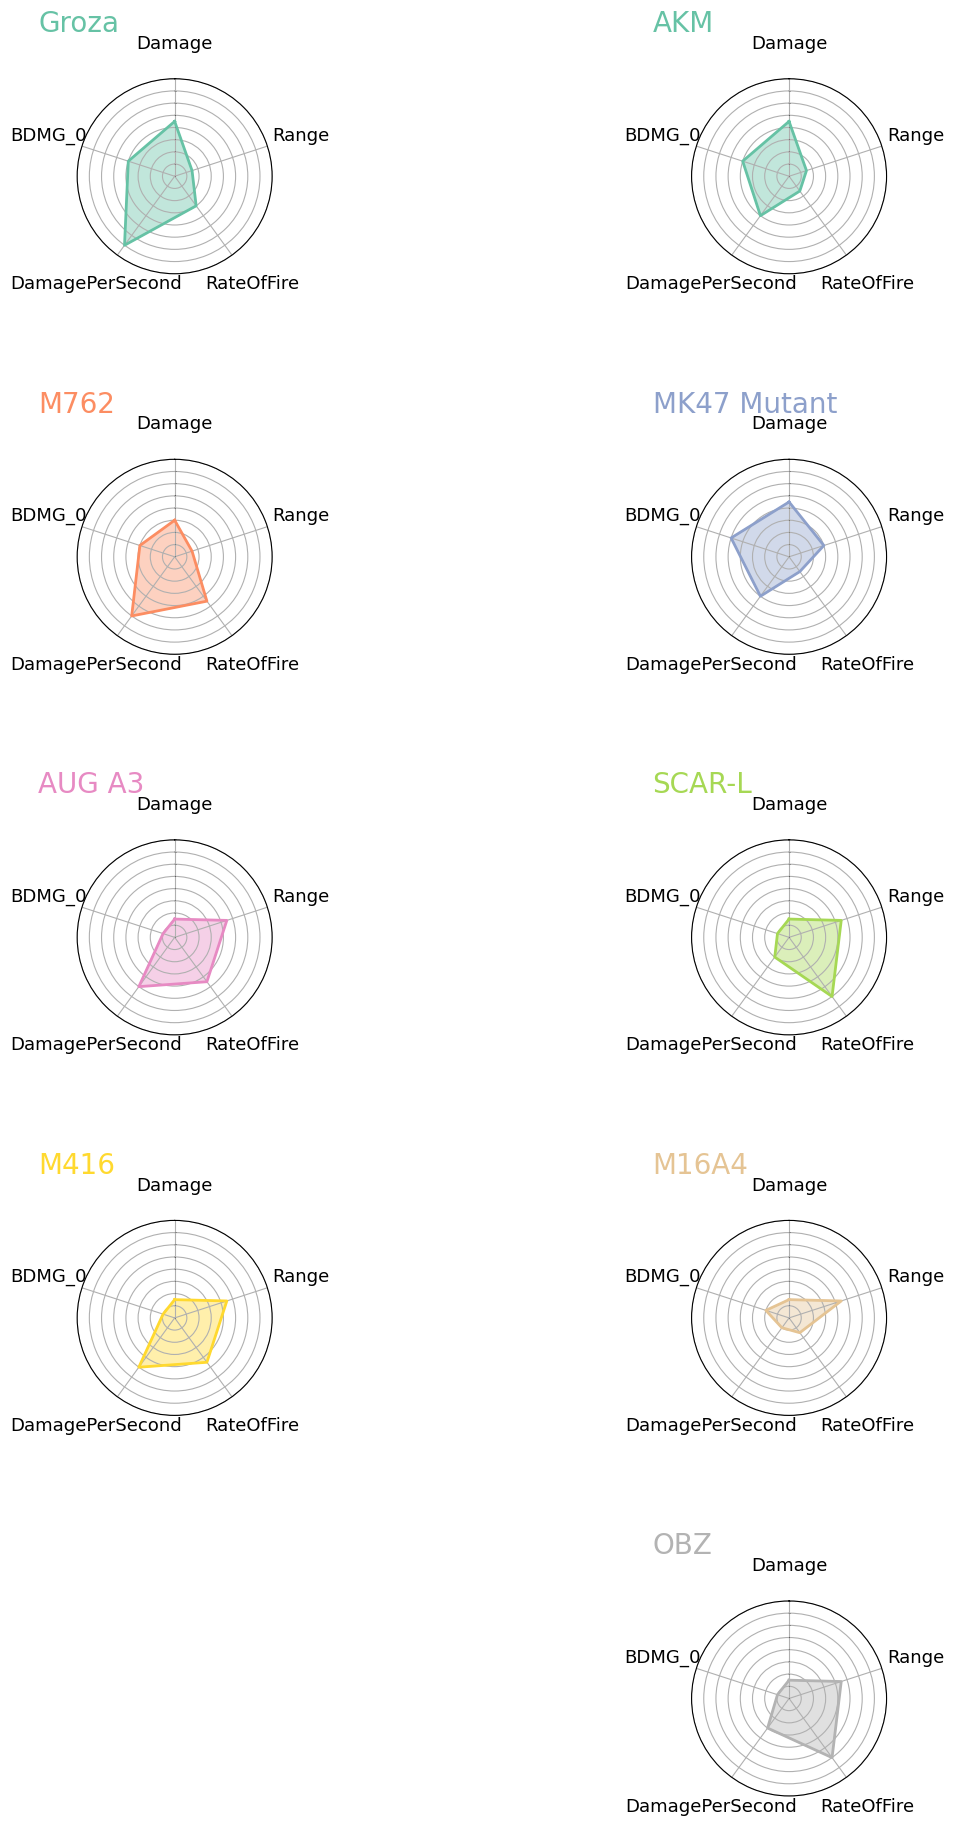

In [12]:
# membuat salinan dari dataframe
data = df.copy()

# mengganti Nama Kolom
rifle = data[data['Weapon Type'] == "Assault Rifle"]
rifle.rename(columns = {"Weapon Name":"WeaponName"
                        ,"Bullet Type":"BulletType"
                       , "Magazine Capacity":"MagazineCapacity"
                       , "Bullet Speed":"BulletSpeed"
                       , "Rate of Fire":"RateOfFire"
                       , "Shots to Kill (Chest)":"ShotsToKillChest"
                       , "Shots to Kill (Head)":"ShotsToKillHead"
                       , "Damage Per Second":"DamagePerSecond"
                       , "Fire Mode":"FireMode"}, inplace = True)
rifle

# menyeleksi kolom yang diperlukan
rifle_new = rifle[['WeaponName', 'Damage', 'Range', 'RateOfFire', 'DamagePerSecond', 'BDMG_0']]

# normalisasi nilai 'damage'
damage_list = list(rifle_new['Damage']) 
dmg_list = []
for i in damage_list:
    if i not in dmg_list:
        dmg_list.append(i)
dmg_list.sort()
for k in range(len(dmg_list)):
    rifle_new.loc[(rifle_new.Damage == dmg_list[k]), 'Damage'] = (1+k)*3

# normalisasi nilai 'range'
range_list = list(rifle_new['Range'])
rg_list = []
for i in range_list:
    if i not in rg_list:
        rg_list.append(i)
rg_list.sort()
for k in range(len(rg_list)):
    rifle_new.loc[(rifle_new.Range == rg_list[k]), 'Range'] = (1+k)*3

# normalisasi nilai 'rateoffire'
rate_list = list(rifle_new['RateOfFire'])
rf_list = []
for i in rate_list:
    if i not in rf_list:
        rf_list.append(i)
rf_list.sort()
for k in range(len(rf_list)):
    rifle_new.loc[(rifle_new.RateOfFire == rf_list[k]), 'RateOfFire'] = (1+k)*3

# normalisasi nilai 'damagepersecond'
dmgPS_list = list(rifle_new['DamagePerSecond'])
dps_list = []
for i in dmgPS_list:
    if i not in dps_list:
        dps_list.append(i)
dps_list.sort()
for k in range(len(dps_list)):
    rifle_new.loc[(rifle_new.DamagePerSecond == dps_list[k]), 'DamagePerSecond'] = (1+k)*2

# normalisasi nilai 'bdmg_0'
BDMG_list = list(rifle_new['BDMG_0'])
bdmg_list = []
for i in BDMG_list:
    if i not in bdmg_list:
        bdmg_list.append(i)
bdmg_list.sort()
for k in range(len(bdmg_list)):
    rifle_new.loc[(rifle_new.BDMG_0 == bdmg_list[k]), 'BDMG_0'] = (1+k)*2

# membuat dataframe final 
rifle_data = rifle_new.copy()

# membuat radar chart
labels = rifle_data.columns[1:]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

# mengatur warna dan ukuran
my_palette = plt.cm.get_cmap("Set2", len(rifle_data.index))
fig = plt.figure(figsize = (15, 20))
fig.set_facecolor('white')

# membuat radar chart untuk setiap senjata
for i, row in rifle_data.iterrows():
    color = my_palette(i)
    data = rifle_data.iloc[i].drop('WeaponName').tolist()
    data += data[:1]
    ax = plt.subplot(5,2,i+1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = 'x', which = 'major', pad = 15)
    ax.set_rlabel_position(0)
    plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize = 0)
    plt.ylim(0,16)
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid')
    ax.fill(angles, data, color = color, alpha = 0.4)
    plt.title(row.WeaponName, size = 20, color=color, x=-0.2, y=1.2, ha='left')
    plt.tight_layout(pad=7)

# menampilkan radar chart
plt.show()

Diagram menunjukkan bahwa **Groza** memiliki DPS tinggi dan _damage_ yang baik tetapi kurang dalam jangkauan, **AKM** memiliki _damage_ yang tinggi tetapi DPS dan _RateOfFire_ yang lebih rendah dibandingkan dengan Groza, **M762** menonjol dalam DPS dan _RateOfFire_ tetapi kurang dalam _damage_ dan _range_, **MK47 Mutant** memiliki keseimbangan antara semua atribut, **AUG A3** unggul dalam semua aspek kecuali _range_, **SCAR-L** memiliki keseimbangan yang baik antara semua atribut tetapi tidak menonjol di mana pun, **M416** juga seimbang dengan keunggulan ringan pada DPS dan _RateOfFire_, **M16A4** memiliki _range_ yang baik tetapi kurang dalam aspek lainnya, dan **OBZ** memiliki statistik yang sama seperti SCAR-L.

## III. Kesimpulan
Berikut merupakan kesimpulan yang telah kami dapatkan setelah melakukan **EDA** (_Exploratory Data Analysis_) terhadap _dataset_ **pubg-weapon-stats.csv**:
- **DPS** (_Damage Per Second_): ‘Groza’ dan ‘M762’ tampaknya unggul.
- **_Damage_**: ‘AKM’ memiliki damage yang tinggi.
- **_Range_**: ‘M16A4’ memiliki range yang baik.
- **Jumlah Amunisi**: ‘M249’ memiliki jumlah amunisi terbanyak di dalam magazin.
- **Letalitas**: ‘S1897’ adalah senjata yang paling letal.
- **Kemampuan Jarak Jauh**: ‘AWM’ memiliki kemampuan jarak jauh terbaik.